In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns

In [4]:
df = pd.read_csv("../data/FuelConsumption.csv")

In [6]:
cdf = df[["CYLINDERS","ENGINESIZE", "CO2EMISSIONS","FUELCONSUMPTION_COMB"]]

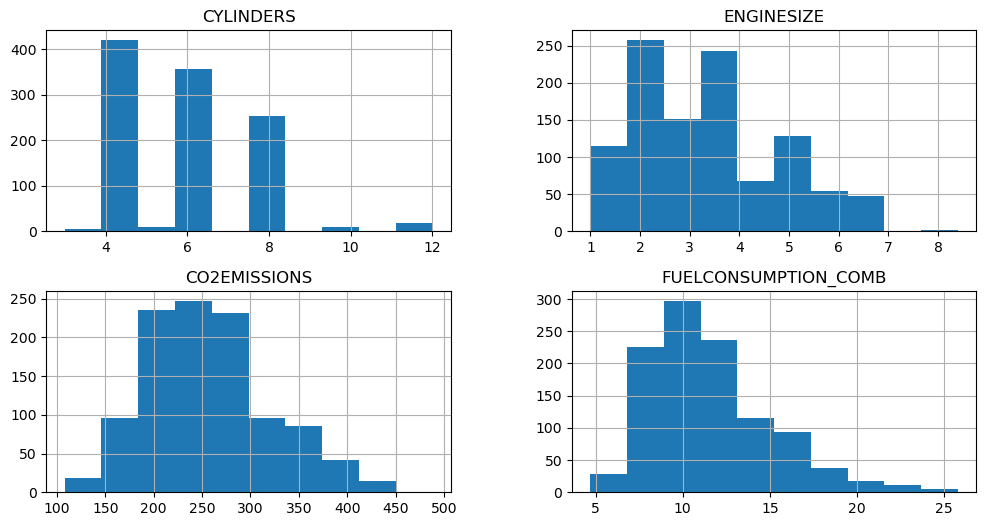

In [49]:
viz = cdf
viz.hist()
plt.show()

In [7]:
cdf.head()

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6


In [34]:
plt.rcParams['figure.figsize'] = (12,6)

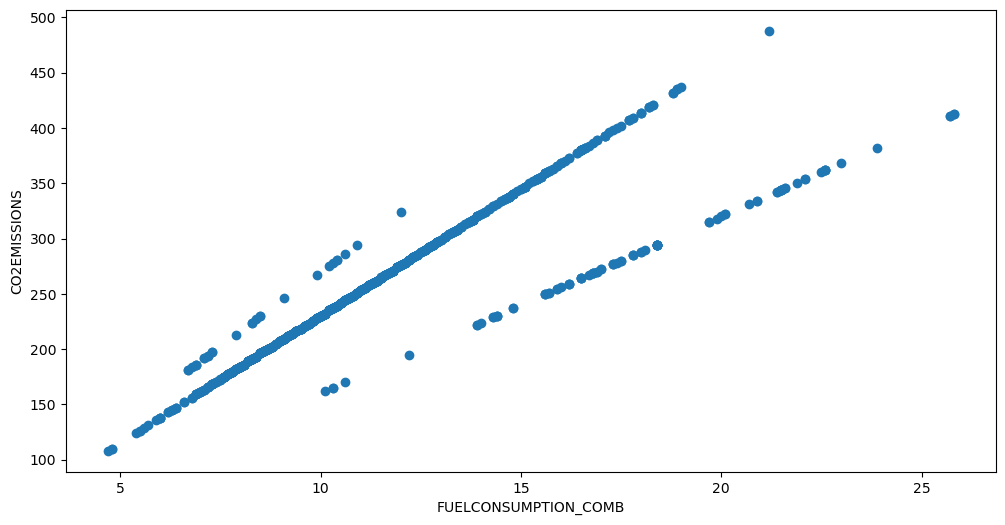

In [35]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

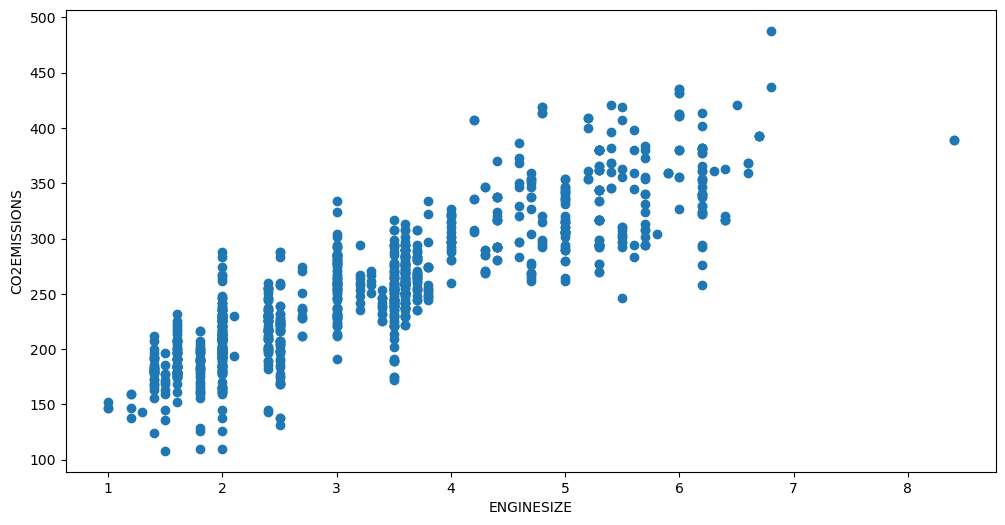

In [36]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

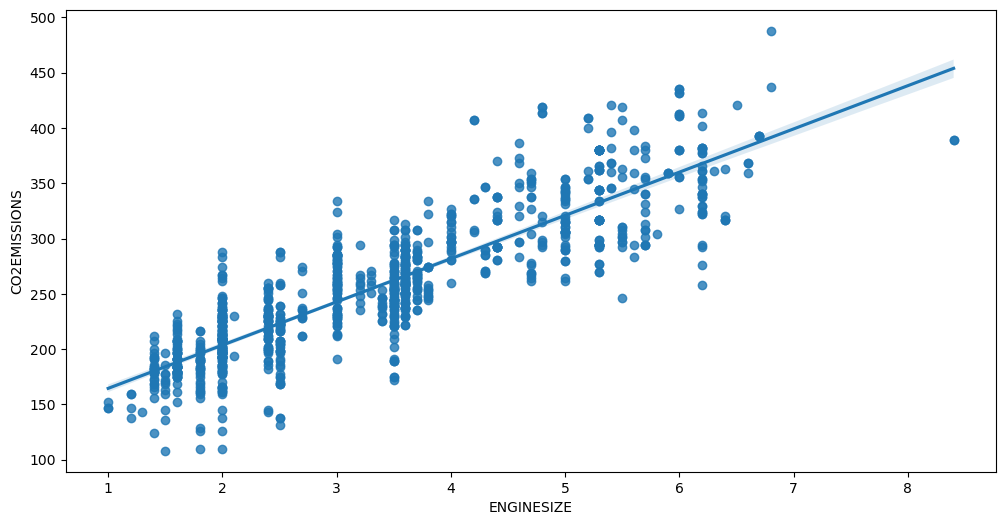

In [37]:
sns.regplot(x=df["ENGINESIZE"], y=df["CO2EMISSIONS"])

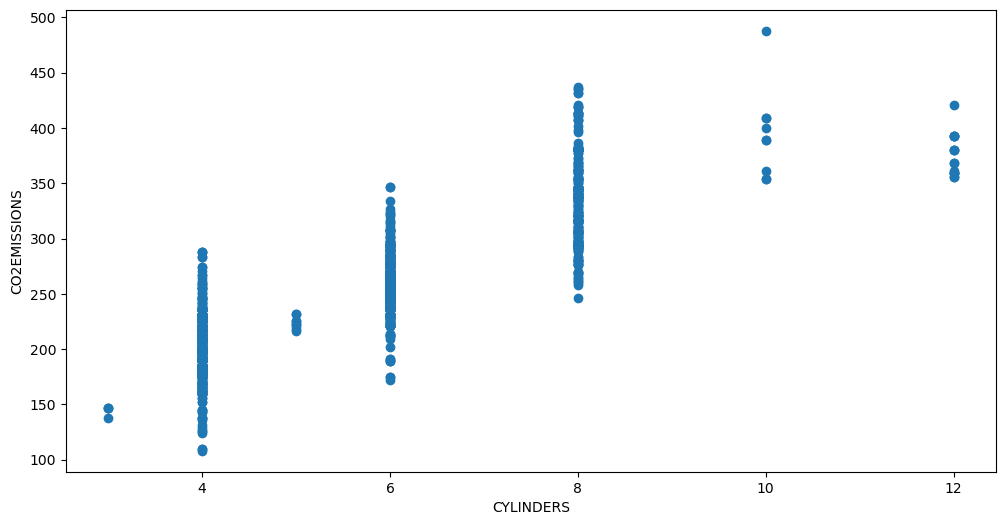

In [38]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [40]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

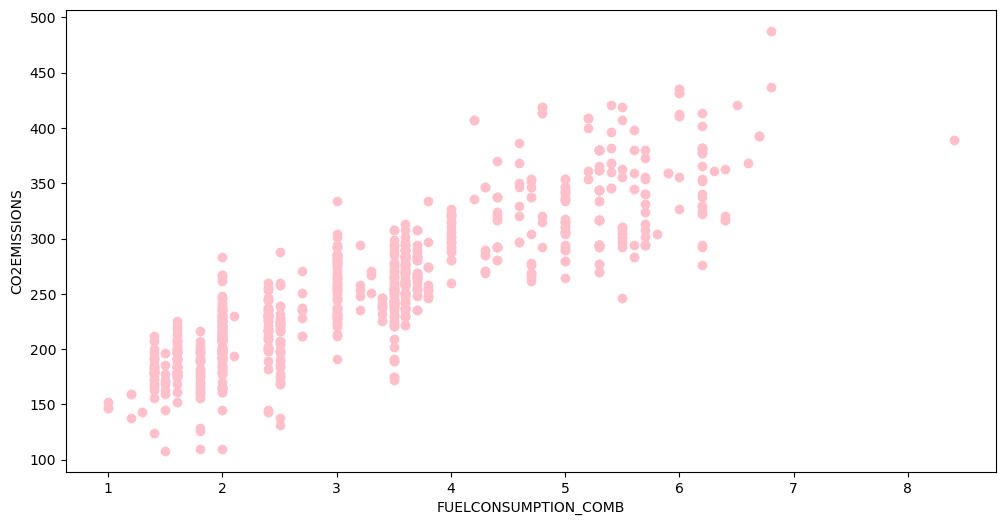

In [41]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color = "pink")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

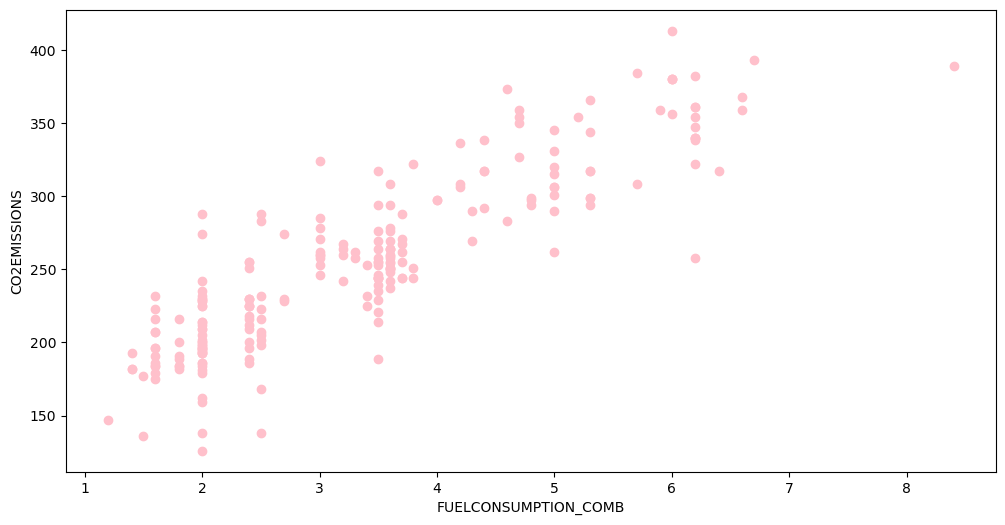

In [42]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,color="pink")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [43]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x,train_y)

LinearRegression()

In [44]:
print(regr.coef_)

[[39.98980284]]


In [45]:
print(regr.intercept_)

[122.84261685]


### Simple Regression Formula

y ̂ = θ0 + θ1 x1 y = a + b * x

y = mx + b y = regr.coef_ * x + intercept_

CO2EMISSIONS = regr.coef_ * ENGINESIZE + intercept_

Text(0, 0.5, 'Emission')

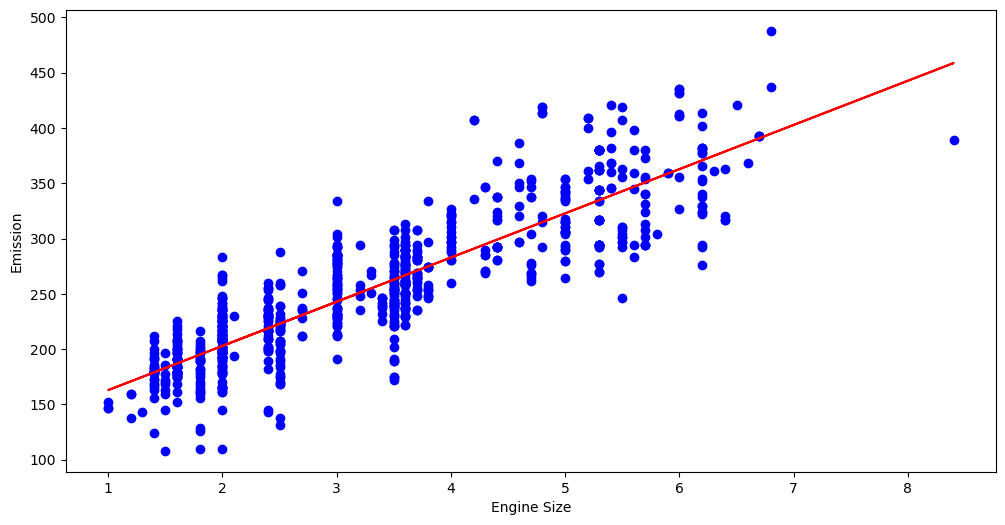

In [53]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.plot(train_x,regr.coef_[0][0]*train_x+ regr.intercept_[0],"-r")
plt.xlabel("Engine Size")
plt.ylabel("Emission")

# Model evaluation metrics:
- mean absolute error
- mean squared error(mse)
- root mean squared error (rmse)

In [46]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [47]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 21.72
Residual sum of squares (MSE): 821.97
R2-score: 0.76


In [48]:
# TODO:
# calculate values for FUELCOMSUMPTION_COMB
# use scikit-learn to implement multiple linear regression
# create a model train it, test it and use the model